In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv("D:/datasets_tableau/friends_episodes_v2.csv")
df

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274
...,...,...,...,...,...,...,...,...
230,2004,10,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
231,2004,10,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
232,2004,10,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
233,2004,10,The Last One,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221


In [8]:
import matplotlib.pylab as plt

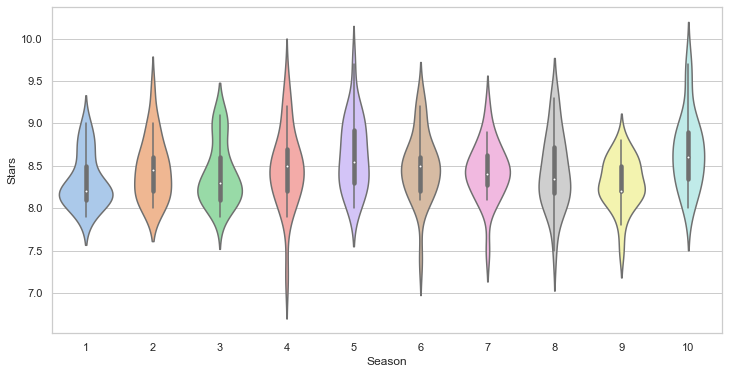

In [84]:
seaborn.set(style="whitegrid")
plt.figure(figsize=(12, 6))
seaborn.violinplot(x='Season', y='Stars', data=df, palette='pastel')


plt.show()

In [62]:
import squarify
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Episodes by each director')

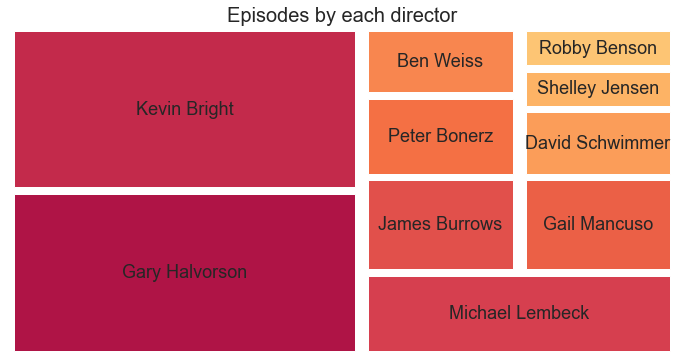

In [71]:
# create a plot figure with figsize
plt.figure(figsize=(12, 6))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(df['Director'].value_counts().head(10),
                     label=df['Director'].value_counts().index,
                     color=seaborn.color_palette("Spectral", len(
                         df['Director'].value_counts())),
                     pad=0.5,
                     text_kwargs={'fontsize': 18})
axis.set_title("Episodes by each director", fontsize=20)

In [73]:
y = df['Director'].value_counts()
y

Gary Halvorson          54
Kevin Bright            54
Michael Lembeck         24
James Burrows           14
Gail Mancuso            14
Peter Bonerz            12
Ben Weiss               10
David Schwimmer         10
Shelley Jensen           6
Robby Benson             6
Terry Hughes             5
Dana De Vally Piazza     3
Sheldon Epps             3
Alan Myerson             2
Thomas Schlamme          2
Roger Christiansen       2
Pamela Fryman            2
Steve Zuckerman          2
Ellen Gittelsohn         1
Sam Simon                1
David Steinberg          1
Joe Regalbuto            1
Andrew Tsao              1
Todd Holland             1
Paul Lazarus             1
Arlene Sanford           1
Stephen Prime            1
Mary Kay Place           1
Name: Director, dtype: int64

In [86]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


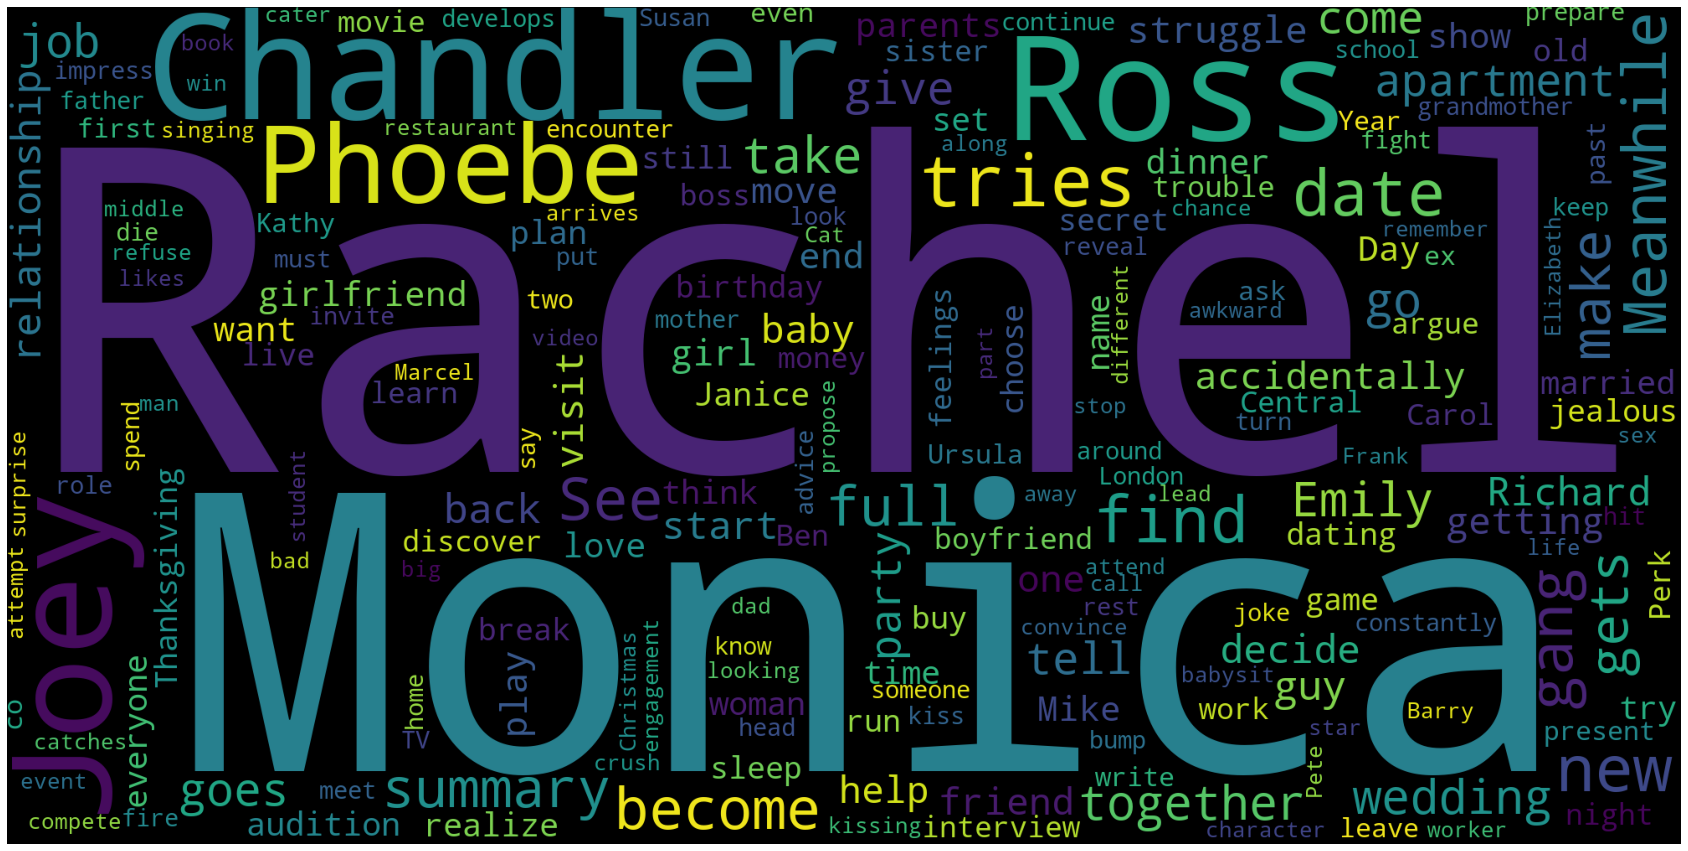

In [90]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

stop_words = set(stopwords.words('english'))
df['comments_no_stopwords'] = df['Summary'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

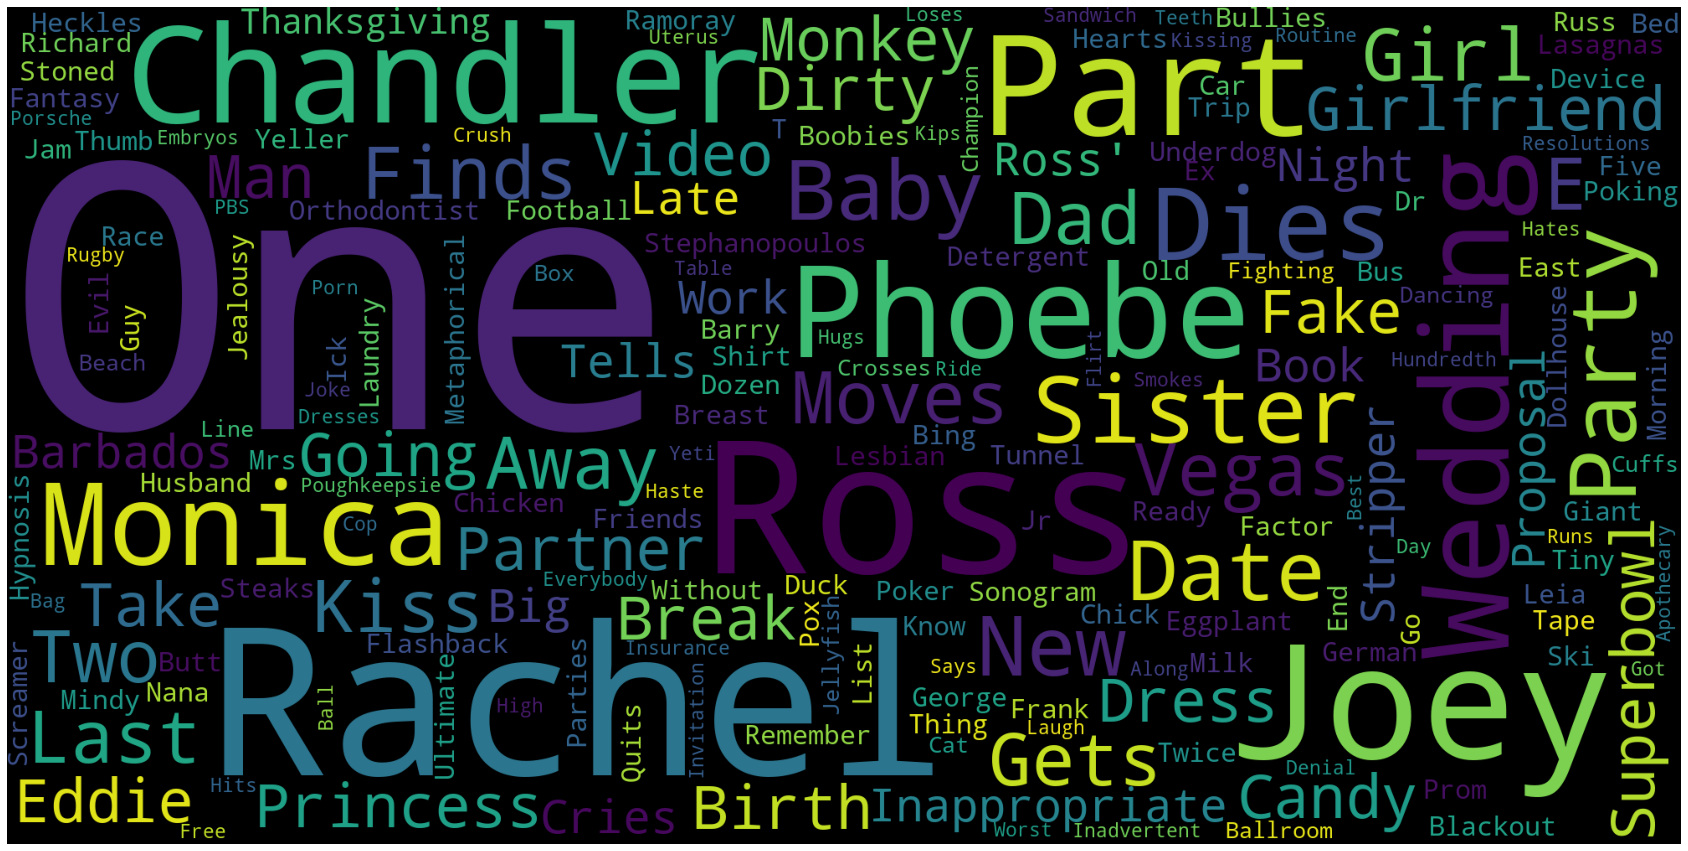

In [91]:
stop_words = set(stopwords.words('english'))
df['comments_no_stopwords'] = df['Episode_Title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)